In [14]:
# Imprting packages :

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [15]:
customers = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\CUSTOMERS.csv')
geo_loc = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\GEO_LOCATION.csv')
order_items = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\ORDER_ITEMS.csv')
order_payments = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\ORDER_PAYMENTS.csv')
order_review_ratings = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\ORDER_REVIEW_RATINGS.csv')
orders = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\ORDERS.csv')
products = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\PRODUCTS.csv')
sellers = pd.read_csv(r'C:\Users\PRIYANSHU\Python_End_to_End\SELLERS.csv')

In [16]:
customers.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh


In [17]:
geo_loc.head(2)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,Akkarampalle,Andhra Pradesh
1,1046,-23.546081,-46.644820,Akkarampalle,Andhra Pradesh


In [18]:
order_items.head(2)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,9/19/2017 9:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,5/3/2017 11:05,239.9,19.93


In [19]:
order_payments.head(2)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


In [20]:
order_review_ratings.head(2)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,1/18/2018 0:00,1/18/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,3/10/2018 0:00,3/11/2018 3:05


In [21]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017 10:56,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018 20:41,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00


In [22]:
products.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


In [23]:
sellers.head(2)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,Alwal,Andhra Pradesh
1,d1b65fc7debc3361ea86b5f14c68d2e2,13023,Alwal,Andhra Pradesh


## 1. Perform Detailed exploratory analysis
### a. Define & calculate high level metrics like (Total Revenue, Total quantity, Total products, Total categories, Total sellers, Total locations, Total channels, Total payment methods etc…)

In [24]:
#Total revenue 
print ('Total revenue =' , round(order_items.price.sum(),2))

# Total quantity
print('Total quantity =', order_items.shape[0])

#Total products
print('Total products =', products.product_id.nunique())

#Total categories
print('Total categories =', products.product_category_name.nunique())

#Total sellers
print('Total sellers =', sellers.seller_id.nunique() )

#Total locations
print('Total locations =', geo_loc.geolocation_zip_code_prefix.nunique())

#Total payment methods
print('Total payment methods =', order_payments.payment_type.nunique())

Total revenue = 13591643.7
Total quantity = 112650
Total products = 32951
Total categories = 71
Total sellers = 3095
Total locations = 19015
Total payment methods = 5


### b. Understanding how many new customers acquired every month

In [25]:
# changing data type to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders.order_purchase_timestamp, format = '%m/%d/%Y %H:%M')

In [26]:
orders['Year_month'] = orders.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%Y-%m"))

In [27]:
#merging customers and orders data
cust_orders = pd.merge(customers , orders , how = 'left' , on= 'customer_id')

In [28]:
cust_month = cust_orders.loc[:, ['customer_unique_id', 'Year_month']] 

In [29]:
cust_month.drop_duplicates(subset='customer_unique_id' , inplace= True)

In [30]:
new_cust_monthly = cust_month.groupby('Year_month')[['customer_unique_id']].count()
new_cust_monthly.head(2)

,customer_unique_id
Year_month,
2016-09,4
2016-10,315


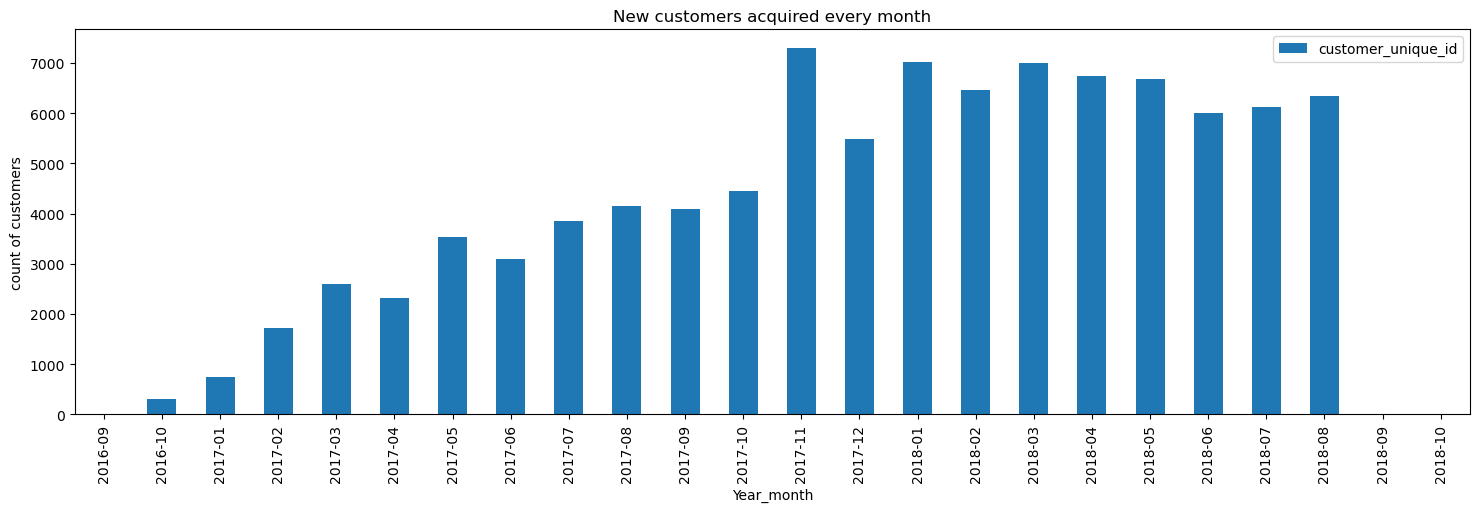

In [31]:
new_cust_monthly.plot( kind = 'bar', figsize = (18,5))
plt.ylabel('count of customers')
plt.title('New customers acquired every month')
plt.show()

### c. Understand the retention of customers on month on month basis

In [32]:
cust_monthly_cnt = cust_orders.groupby('Year_month')[['customer_unique_id']].count().reset_index()
cust_monthly_cnt.head(2)

,Year_month,customer_unique_id
0,2016-09,4
1,2016-10,324


In [33]:
cust_monthly_cnt.customer_unique_id.sum()

99441

In [34]:
retented_cust_monthly = pd.merge(new_cust_monthly , cust_monthly_cnt , how= 'left' , on ="Year_month")
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y
0,2016-09,4,4
1,2016-10,315,324


In [35]:
retented_cust_monthly['retented_cust'] = retented_cust_monthly.customer_unique_id_y - retented_cust_monthly.customer_unique_id_x
retented_cust_monthly.head(2)

,Year_month,customer_unique_id_x,customer_unique_id_y,retented_cust
0,2016-09,4,4,0
1,2016-10,315,324,9


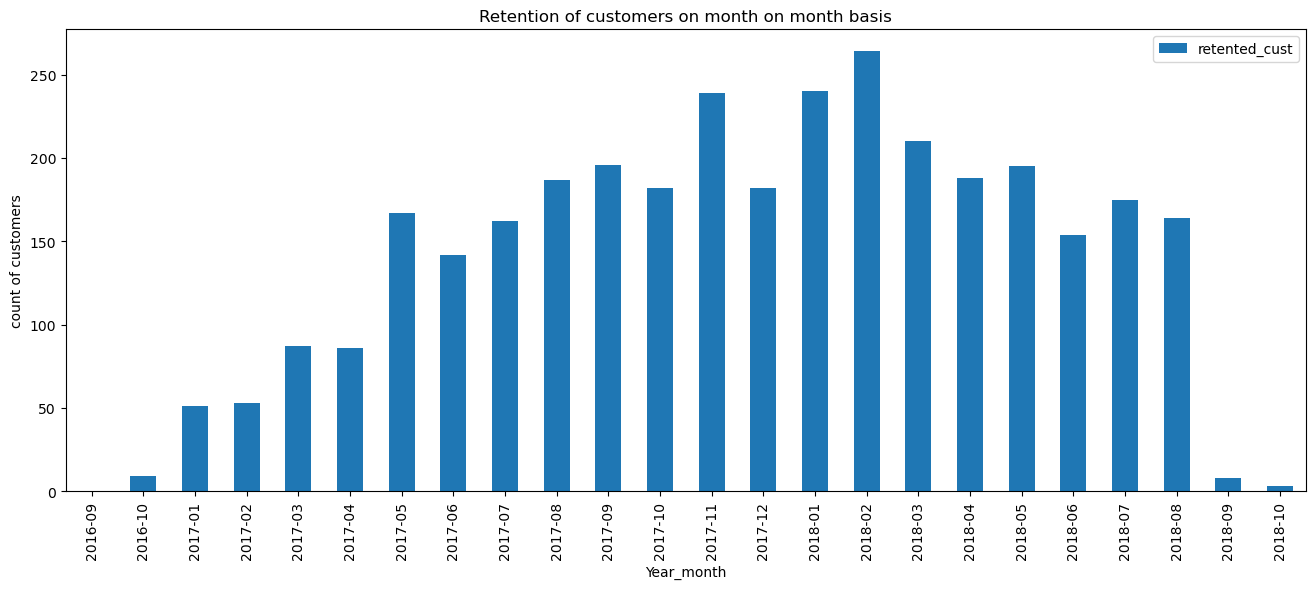

In [36]:
retented_cust_monthly.plot(kind= 'bar', x= 'Year_month' , y = 'retented_cust' , figsize = (16,6))
plt.ylabel('count of customers')
plt.title('Retention of customers on month on month basis')
plt.show()

### d. How the revenues from existing/new customers on month on month basis

In [37]:
order_item_month = pd.merge(order_items , orders , how= 'left' , on= 'order_id')

In [38]:
order_item_month['net_price'] = order_item_month.price + order_item_month.freight_value

In [39]:
rev_mouth = order_item_month.groupby('Year_month')[['net_price']].sum()
rev_mouth.head(2)

,net_price
Year_month,
2016-09,354.75
2016-10,56808.84


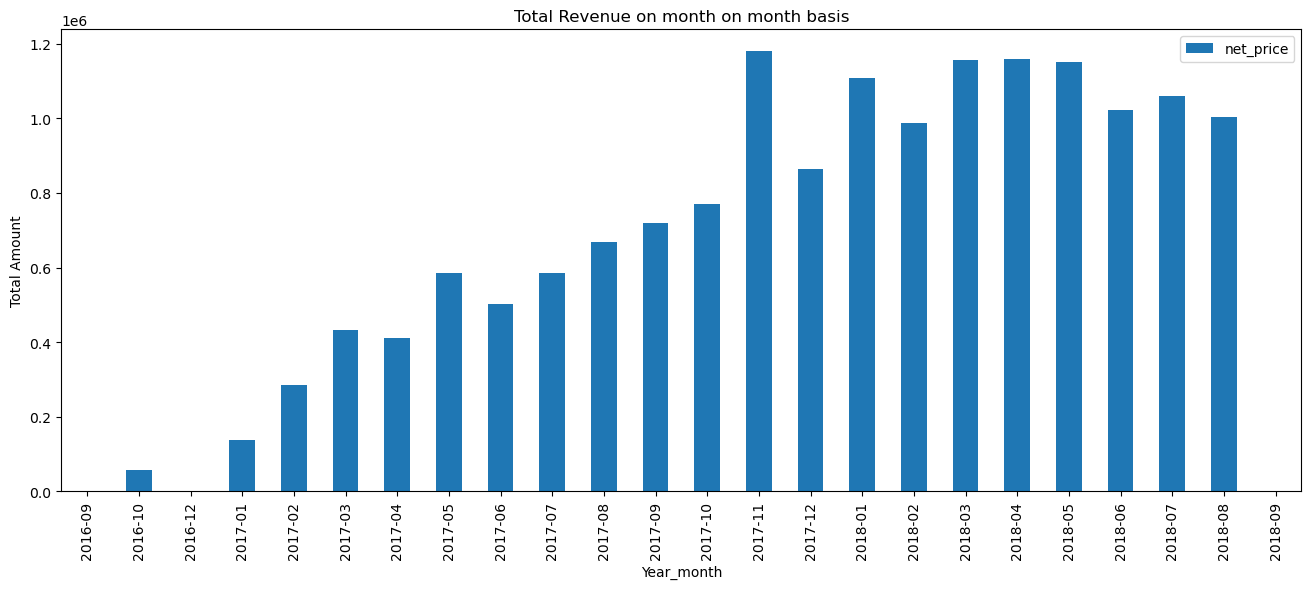

In [40]:
rev_mouth.plot( kind = 'bar', figsize =(16,6))
plt.ylabel('Total Amount')
plt.title('Total Revenue on month on month basis')
plt.show()

### e. Understand the trends/seasonality of sales, quantity by category, location, month, week, day, time, channel, payment method etc…

In [41]:
order_items_prod = pd.merge( order_item_month , products , how ='left' , on = 'product_id')
orders_items_prod['month'] = orders_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%b"))
orders_items_prod.head(2)

NameError: name 'orders_items_prod' is not defined

In [42]:
# Seasonality of sales, quantity by category.
cat_qty_sales = order_items_prod.groupby('product_category_name').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
cat_qty_sales

,product_category_name,quantity,sales
0,Agro_Industry_And_Commerce,212,72530.47
1,Air_Conditioning,297,55024.96
2,Art,209,24202.64
3,Arts_And_Craftmanship,24,1814.01
4,Audio,364,50688.50
...,...,...,...
66,Stationery,2517,230943.23
67,Tablets_Printing_Image,83,7528.41
68,Telephony,4545,323667.53
69,Toys,4117,483946.60


In [43]:
# Seasonality of sales, quantity by Month.
month_qty_sales = orders_items_prod.groupby('month').agg({'product_id':'count',
                                                       'price': 'sum'}).reset_index().rename(columns={'product_id':'quantity',
                                                                                                      'price':'sales'})
month_qty_sales

NameError: name 'orders_items_prod' is not defined

### f. Popular Products by seller, state, category.

In [44]:
# Popular product by sellers 

prod_seller = order_items_prod.groupby(['seller_id','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_seller= prod_seller.sort_values(by=['seller_id','count']).drop_duplicates(subset='seller_id' ,keep='last')
prod_seller

,seller_id,product_id,count
0,0015a82c2db000af6aaaf3ae2ecb0532,a2ff5a97bf95719e38ea2e3b4105bce8,3
1,001cca7ae9ae17fb1caed9dfb1094831,08574b074924071f4e201e151b152b4e,113
12,001e6ad469a905060d959994f1b41e4f,093cd981b714bcdff182b427d87fc8fc,1
14,002100f778ceb8431b7a1020ff7ab48f,158102fe543dbaeb84d87811bfe06d0d,17
37,003554e2dce176b5555353e4f3555ac8,67f36b3689147d882d2b298fd0715d80,1
...,...,...,...
34388,ffcfefa19b08742c5d315f2791395ee5,cea898bfbca0b5b0e7b36cecd350709e,1
34397,ffdd9f82b9a447f6f8d4b91554cc7dd3,ada800a927673ac73cdfbbd2c832331b,5
34402,ffeee66ac5d5a62fe688b9d26f83f534,1347d4320dcd0acd750e37bb3d94a918,10
34430,fffd5413c0700ac820c7069d66d98c89,ebb12274522d82caa7dca657873b2ad7,6


In [45]:
# Popular product by category
prod_cat = order_items_prod.groupby(['product_category_name','product_id']).agg({'product_id':'count'}).rename(columns={'product_id':'count'}).reset_index()
prod_cat= prod_cat.sort_values(by=['product_category_name','count']).drop_duplicates(subset='product_category_name' ,keep='last')
prod_cat

,product_category_name,product_id,count
7,Agro_Industry_And_Commerce,11250b0d4b709fee92441c5f34122aed,22
144,Air_Conditioning,98e91d0f32954dcd8505875bb2b42cdb,17
218,Art,4fe644d766c7566dbc46fb851363cb3b,107
267,Arts_And_Craftmanship,b9976e9c22fb1540bd71d1bcd2989475,5
316,Audio,db5efde3ad0cc579b130d71c4b2db522,48
...,...,...,...
28426,Stationery,fb55982be901439613a95940feefd9ee,84
28449,Tablets_Printing_Image,6bbe55cf8f85c87b6eebb775a53402f4,33
29470,Telephony,e7cc48a9daff5436f63d3aad9426f28b,93
30360,Toys,880be32f4db1d9f6e2bec38fb6ac23ab,99


### g. Popular categories by month

In [46]:
#orders_items_prod = pd.merge(order_item_month , products , on='product_id', how='left')
#orders_items_prod['month'] = orders_items_prod.order_purchase_timestamp.apply(lambda x: pd.Timestamp.strftime(x , format = "%m"))

In [47]:
# Popular category by month
cat_month = orders_items_prod.groupby(['month','product_category_name']).agg({'product_category_name':'count'}).rename(columns={'product_category_name':'count'}).reset_index()
cat_month= cat_month.sort_values(by=['month','count']).drop_duplicates(subset='month' ,keep='last')
cat_month

NameError: name 'orders_items_prod' is not defined

### h. List top 10 most expensive products sorted by price

In [48]:
print('Top 10 most expensive products sorted by price :')
order_items.loc[:, ['product_id',
                         'price']].drop_duplicates(subset='product_id' ).sort_values(by='price',
                                                                                                ascending = False).head(10)

Top 10 most expensive products sorted by price :


,product_id,price
3556,489ae2aa008f021502940f251d4cce7f,6735.00
112233,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00
107841,1bdf5e6731585cf01aa8169c7028d6ad,6499.00
74336,a6492cc69376c469ab6f61d8f44de961,4799.00
11249,c3ed642d592594bb648ff4a04cee2747,4690.00
62086,259037a6a41845e455183f89c5035f18,4590.00
29193,a1beef8f3992dbd4cd8726796aa69c53,4399.87
45843,6cdf8fc1d741c76586d8b6b15e9eef30,4099.99
59137,6902c1962dd19d540807d0ab8fade5c6,3999.90
56663,4ca7b91a31637bd24fb8e559d5e015e4,3999.00


## 2. Performing Customers/sellers Segmentation
### a. Divide the customers into groups based on the revenue generated

In [49]:
cust_order_item = pd.merge(cust_orders , order_items , how ='inner', on= 'order_id' )
cust_order_item.head(2)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,Adilabad,Andhra Pradesh,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:00,5/16/2017 15:22,5/23/2017 10:47,5/25/2017 10:35,6/5/2017 0:00,2017-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,5/22/2017 15:22,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,Adoni,Andhra Pradesh,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:00,1/12/2018 20:58,1/15/2018 17:14,1/29/2018 12:41,2/6/2018 0:00,2018-01,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,1/18/2018 20:58,289.00,46.48


In [50]:
cust_order_item['net_price'] = cust_order_item.price + cust_order_item.freight_value

In [51]:
cust_rev = cust_order_item.groupby('customer_unique_id')['net_price'].sum().reset_index()
cust_rev.rename(columns ={'net_price':'total_spend_amt'} , inplace = True)
cust_rev.head(2)

,customer_unique_id,total_spend_amt
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19


In [52]:
cust_rev['cust_rev_group'] = pd.cut(cust_rev.total_spend_amt,
                               bins= np.arange(0 , 15000, 1000),
                               labels=['0-1000','1000-2000','2000-3000','3000-4000',
                                       '4000-5000','5000-6000','6000-7000','7000-8000','8000-9000',
                                      '9000-10000','10000-11000','11000-12000','12000-13000','13000-14000'])

In [53]:
cust_rev.head()

,customer_unique_id,total_spend_amt,cust_rev_group
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,0-1000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,0-1000
2,0000f46a3911fa3c0805444483337064,86.22,0-1000
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,0-1000
4,0004aac84e0df4da2b147fca70cf8255,196.89,0-1000


### b. Divide the sellers into groups based on the revenue generated

In [54]:
sellers_rev = order_items.groupby('seller_id')['price'].sum().reset_index()

In [55]:
sellers_rev.rename( columns = {'price':'total_sold_amt'}, inplace= True)

In [56]:
sellers_rev.total_sold_amt.max()

229472.63

In [57]:
sellers_rev['sellers_rev_group'] = pd.cut(sellers_rev.total_sold_amt,
                               bins= np.arange(0 , 300000, 50000),
                               labels=['0-50000','50000-100000','100000-150000','150000-200000',
                                       '200000-250000'])

In [58]:
sellers_rev.head()

,seller_id,total_sold_amt,sellers_rev_group
0,0015a82c2db000af6aaaf3ae2ecb0532,2685.00,0-50000
1,001cca7ae9ae17fb1caed9dfb1094831,25080.03,0-50000
2,001e6ad469a905060d959994f1b41e4f,250.00,0-50000
3,002100f778ceb8431b7a1020ff7ab48f,1234.50,0-50000
4,003554e2dce176b5555353e4f3555ac8,120.00,0-50000


## 3. Cross-Selling (Which products are selling together)

In [59]:
orders_order_items = pd.merge(orders , order_items , how='left' , on='order_id' )
orders_order_items.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76


In [60]:
cross_selling = orders_order_items[orders_order_items.duplicated(['order_purchase_timestamp','customer_id'],
                                                                 keep=False)].sort_values(by='order_purchase_timestamp')
cross_selling = cross_selling.loc[:,['customer_id','order_purchase_timestamp','product_id' ]]

cross_selling.drop_duplicates(subset ="product_id" ,inplace=True)
cross_selling = cross_selling[cross_selling.duplicated(['order_purchase_timestamp','customer_id'],
                                                       keep=False)].sort_values(by='order_purchase_timestamp').reset_index()
cross_selling.drop(columns = 'index',axis=1, inplace=True)

print('Products with same customer id and order purchase timestamp are cross selling')
cross_selling

Products with same customer id and order purchase timestamp are cross selling


,customer_id,order_purchase_timestamp,product_id
0,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,f293394c72c9b5fafd7023301fc21fc2
1,08c5351a6aca1c1589a38f244edeee9d,2016-09-04 21:15:00,c1488892604e4ba5cff5b4eb4d595400
2,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,79938780eb7ffb7289f59a9a283bc06b
3,a0f95ab56c6d3a5ba0036b7fdfeda07f,2016-10-04 15:02:00,8f1e43e0e3374ed8c84df748034d6179
4,00474d2582fd72663036795b7ab8cfc1,2016-10-04 22:33:00,35bd74b6319ba18ae4f30d8b54144fd2
...,...,...,...
3566,72a366446dd3abfc90c598896714d85c,2018-08-26 11:02:00,7052c556fc966a2321d570f3c5a8790f
3567,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,df4bcf4a328103951507064660c445e9
3568,e5a8aaccb766e00177b0a587979cc814,2018-08-26 11:44:00,3af5874bd2429ed183a5445d1432fcde
3569,c24bbeb8111fea27eab791a37e665210,2018-08-27 12:39:00,b6b220a6c539cb65be34eed6fea8fe63


## 4. Payment Behaviour
### a. How customers are paying?

In [61]:
payment_types = order_payments.payment_type.drop_duplicates().reset_index().drop(columns = 'index')

print('Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.')
payment_types

Customers are paying by Credit cards, UPIs, Vouchers and Debit cards.


,payment_type
0,credit_card
1,UPI
2,voucher
3,debit_card
4,not_defined


### b. Which payment channels are used by most customers?

In [62]:
payment_chnnl = order_payments.groupby('payment_type')[['payment_type']].count()
payment_chnnl = payment_chnnl.rename( columns={'payment_type':'No_of_transaction'}).sort_values(by='No_of_transaction',
                                                                                                              ascending = False).reset_index()
print('For the payments, Credit card and UPI are used by most of the customers')
payment_chnnl

For the payments, Credit card and UPI are used by most of the customers


,payment_type,No_of_transaction
0,credit_card,76795
1,UPI,19784
2,voucher,5775
3,debit_card,1529
4,not_defined,3


## 5. Customer satisfaction towards category & product
### a. Which categories (top 10) are maximum rated & minimum rated?

In [63]:
order_items_prod_review = pd.merge(order_items_prod, order_review_ratings ,how= 'left', on = 'order_id')
category_review = order_items_prod_review.groupby('product_category_name')['review_score'].sum().reset_index()
max_rate_cat = category_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated product categories :')
max_rate_cat

Top ten maximum rated product categories :


,product_category_name,review_score
0,Bed_Bath_Table,43636
1,Health_Beauty,40121
2,Sports_Leisure,35616
3,Furniture_Decor,32716
4,Computers_Accessories,30953
5,Housewares,28235
6,Watches_Gifts,24016
7,Telephony,17907
8,Garden_Tools,17572
9,Auto,17193


In [64]:
min_rate_cat = category_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated product categories :')
min_rate_cat

Top ten minimum rated product categories :


,product_category_name,review_score
0,Security_And_Services,5
1,Fashion_Childrens_Clothes,36
2,La_Cuisine,53
3,Cds_Dvds_Musicals,65
4,Arts_And_Craftmanship,99
5,Home_Comfort_2,101
6,Diapers_And_Hygiene,127
7,Fashion_Sport,132
8,Flowers,139
9,Furniture_Mattress_And_Upholstery,145


### b. Which products (top10) are maximum rated & minimum rated?

In [65]:
product_review = order_items_prod_review.groupby('product_id')['review_score'].sum().reset_index()
max_rate_prod = product_review.sort_values(by='review_score',ascending = False).head(10).reset_index().drop(columns = 'index')

print('Top ten maximum rated products :')
max_rate_prod

Top ten maximum rated products :


,product_id,review_score
0,aca2eb7d00ea1a7b8ebd4e68314663af,2112
1,422879e10f46682990de24d770e7f83d,1920
2,99a4788cb24856965c36a24e339b6058,1896
3,389d119b48cf3043d311335e499d9c6b,1612
4,368c6c730842d78016ad823897a372db,1531
5,53759a2ecddad2bb87a079a1f1519f73,1448
6,d1c427060a0f73f6b889a5c7c61f2ac4,1432
7,53b36df67ebb7c41585e8d54d6772e08,1348
8,154e7e31ebfa092203795c972e5804a6,1264
9,3dd2a17168ec895c781a9191c1e95ad7,1147


In [66]:
min_rate_prod = product_review.sort_values(by='review_score').head(10).reset_index().drop(columns = 'index')

print('Top ten minimum rated products :')
min_rate_prod

Top ten minimum rated products :


,product_id,review_score
0,e03071a2d2410c9ef2be47b508cac95f,1
1,b56ff361e0733eebc1d010432936b706,1
2,7ed8c74b7ad2f1790a24a24c071da537,1
3,43c81702c9aca96af077286a5b2525b9,1
4,1da4613d4f7e10e1554538b46dd16486,1
5,ed9d81a5043f74cbe0e3db315770af45,1
6,5096e827f6152df3974343e735a52dc9,1
7,1da0fbb35cfdc9fcb6d48dfddca69513,1
8,1d9c9e0532fb481c0f89c3b20cec62e6,1
9,8ec6aedf40e1175c5446134c40931706,1


### c. Average rating by location, seller,  month etc.

In [67]:
order_review_ratings2 = pd.merge(orders, order_review_ratings, on='order_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, customers, on='customer_id' , how='left')
order_review_ratings2 = pd.merge(order_review_ratings2, order_items, on='order_id' , how='left')
order_review_ratings2.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Year_month,review_id,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:00,10/2/2017 11:07,10/4/2017 19:55,10/10/2017 21:25,10/18/2017 0:00,2017-10,a54f0611adc9ed256b57ede6b6eb5114,...,7c396fd4830fd04220f754e42b4e5bff,3149,Akkarampalle,Andhra Pradesh,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017 11:07,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:00,7/26/2018 3:24,7/26/2018 14:31,8/7/2018 15:27,8/13/2018 0:00,2018-07,8d5266042046a06655c8db133d120ba5,...,af07308b275d755c9edb36a90c618231,47813,Pandariya,Chhattisgarh,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018 3:24,118.70,22.76


In [68]:
# Average rating by location
avg_rating_location = order_review_ratings2.groupby('customer_state')['review_score'].mean().reset_index()
avg_rating_location.rename(columns={'customer_state':'Location', 'review_score':'Avg_review'}, inplace =True)
avg_rating_location

,Location,Avg_review
0,Andhra Pradesh,3.980414
1,Arunachal Pradesh,4.024219
2,Chhattisgarh,4.015419
3,Delhi,4.023483
4,Goa,4.800000
5,Gujarat,4.018021
6,Haryana,4.080142
7,Himachal Pradesh,3.984706
8,Jammu & Kashmir,4.006211
9,Karnataka,3.996825


In [69]:
# Average rating by seller
avg_rating_seller = order_review_ratings2.groupby('seller_id')['review_score'].mean().reset_index()
avg_rating_seller.rename(columns={'review_score':'Avg_review'}, inplace =True)
avg_rating_seller

,seller_id,Avg_review
0,0015a82c2db000af6aaaf3ae2ecb0532,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,3.874477
2,001e6ad469a905060d959994f1b41e4f,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,3.982143
4,003554e2dce176b5555353e4f3555ac8,5.000000
...,...,...
3090,ffcfefa19b08742c5d315f2791395ee5,1.000000
3091,ffdd9f82b9a447f6f8d4b91554cc7dd3,4.250000
3092,ffeee66ac5d5a62fe688b9d26f83f534,4.214286
3093,fffd5413c0700ac820c7069d66d98c89,3.885246
